# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated
- all targets displays the same covariance matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distributed feature

             x        fx  y
711   7.504946  6.320344  0
159   0.790784  0.676869  0
64    3.058719  2.460336  0
242   4.329711  3.769581  0
228  10.007892  8.700560  0


<AxesSubplot:xlabel='fx', ylabel='Count'>

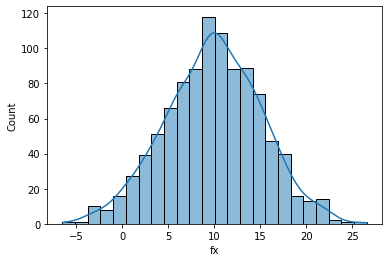

In [2]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'x':x, 'fx': fx,'y':y})
print(data.sample(5))

sns.histplot(data=data, x='fx', kde=True)

In [3]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'fx']
sample_class0 = data.loc[data['y'] == 0, 'fx']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
data['discriminant_fx_class1'] = data['fx'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
data['discriminant_fx_class0'] = data['fx'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

14.043875427578383
5.846454779047029
0.497
0.503
9.929792707790913


In [4]:
#comparing results
data['prediction_lda'] = np.where(data['discriminant_fx_class1'] > data['discriminant_fx_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[503   0]
 [ 10 487]]
0.99
1.0
0.9798792756539235


<AxesSubplot:xlabel='fx', ylabel='discriminant_fx_class1'>

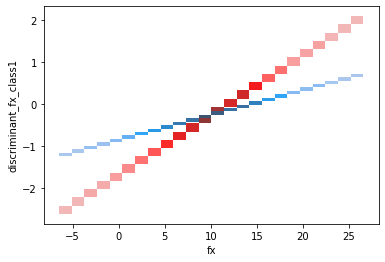

In [5]:
#graphing the probabilty
sns.histplot(data=data, x='fx', y='discriminant_fx_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='discriminant_fx_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 

### Cenario 2 - LDA with 3 normal distributed and differents covariance matrices

            xA         xB        xC         fx  y
290   2.384046  -4.709882 -1.808371  -4.134207  0
122   6.520869 -18.746502 -8.344089 -20.569721  0
913  18.825122  -7.418882 -6.903628   4.502612  1
273   4.513953  -3.780751  5.766311   6.499514  1
915  17.149343  -9.758725  8.801415  16.192034  1


<AxesSubplot:xlabel='value', ylabel='Count'>

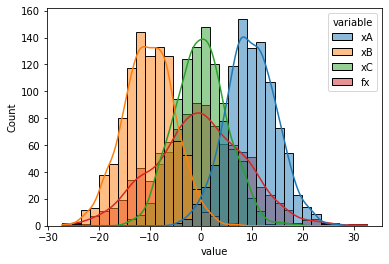

In [6]:
#feature A
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)


#feature C
meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

fx = xA + xB + xC

y = [1 if i >= fx.mean() else 0 for i in fx]
#y = [1 if i >= (meanA + meanB + meanC) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

In [7]:
#splitting the classes and checking covariance matrix
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

cov_class1 = sample_class1.cov()
print(cov_class1)

cov_class0 = sample_class0.cov()
print(cov_class0)

           xA         xB         xC
xA  19.357841  -4.853061  -4.563991
xB  -4.853061  18.859192  -5.312231
xC  -4.563991  -5.312231  21.249282
           xA         xB         xC
xA  20.601431  -5.728951  -4.063289
xB  -5.728951  20.341197  -5.761823
xC  -4.063289  -5.761823  19.072519


One of the assumptions require for LDA is that every sample conditional to each class should have equal covariance matrix. The number above shows that sa different story. This will be responsible for a non-linear curve plot at the end of the example.

In [8]:
#LDA
#step 1: splitting the classes (already done)
#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = np.array(sample_class1.mean()).reshape(3,1)
mean_class1_t = mean_class1.reshape(1,3)
print(mean_class1)

mean_class0 = np.array(sample_class0.mean()).reshape(3,1)
mean_class0_t = mean_class0.reshape(1,3)
print(mean_class0)


ln_prob_class1 = np.log(len(sample_class1)/len(data))
print(ln_prob_class1)

ln_prob_class0 = np.log(len(sample_class0)/len(data))
print(ln_prob_class0)


#step 3: calculate inverse covariance of each sample
inv_cov_class1 = np.linalg.inv(np.array(cov_class1))
print(inv_cov_class1)

inv_cov_class0 = np.linalg.inv(np.array(cov_class0))
print(inv_cov_class0)

[[12.02640975]
 [-7.79470258]
 [ 2.41780203]]
[[  7.76628952]
 [-12.71258467]
 [ -2.44347964]]
-0.6792442753909539
-0.707246104939447
[[0.06124388 0.02093976 0.01838902]
 [0.02093976 0.06420077 0.02054743]
 [0.01838902 0.02054743 0.05614684]]
[[0.05836315 0.02182741 0.01902801]
 [0.02182741 0.06192516 0.02335784]
 [0.01902801 0.02335784 0.06354169]]


LDA decision function equation:

<img src="img/decision_fx_equation.PNG" />

*source: https://arxiv.org/pdf/1906.02590.pdf*

In [9]:
#step 4: create decision functions
X = data[['xA', 'xB', 'xC']]
y = data['y']
decision_fx_class1 = []
decision_fx_class0 = []

for i in range(len(X)):
    #assigning x row for row 
    x = np.array(X.loc[i]).reshape(3, 1)
    x_t = x.reshape(1, 3)

    #decision function class 1
    fx1 = -0.5 * np.matmul(np.matmul(x_t, inv_cov_class1), x) \
          -0.5 * np.matmul(np.matmul(mean_class1_t, inv_cov_class1), mean_class1) \
          + np.matmul(np.matmul(mean_class1_t, inv_cov_class1), x) \
          + ln_prob_class1  

    #decision function class 0
    fx0 = -0.5 * np.matmul(np.matmul(x_t, inv_cov_class0), x) \
          -0.5 * np.matmul(np.matmul(mean_class0_t, inv_cov_class0), mean_class0) \
          + np.matmul(np.matmul(mean_class0_t, inv_cov_class0), x) \
          + ln_prob_class0  
      

    decision_fx_class1.append(np.asscalar(fx1))
    decision_fx_class0.append(np.asscalar(fx0))

data['fx1_manual'] = decision_fx_class1
data['fx0_manual'] = decision_fx_class0
data['fx1_minus_fx0_manual'] = data['fx1_manual'] - data['fx0_manual']
data['prediction_manual'] = np.where(data['fx1_minus_fx0_manual'] >= 0, 1, 0)

data.sample(3)

C:\Users\Kenji\AppData\Local\Temp\ipykernel_4336\981196073.py:25: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class1.append(np.asscalar(fx1))
C:\Users\Kenji\AppData\Local\Temp\ipykernel_4336\981196073.py:26: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class0.append(np.asscalar(fx0))


,xA,xB,xC,fx,y,fx1_manual,fx0_manual,fx1_minus_fx0_manual,prediction_manual
93,7.718852,-12.771101,0.035222,-5.017026,0,-3.082971,-0.897052,-2.185919,0
781,4.486771,-11.488561,5.234936,-1.766854,0,-3.059553,-2.593394,-0.466159,0
351,14.630680,2.186928,-0.620377,16.197231,1,-4.120025,-12.166452,8.046427,1


In [10]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_manual']))
print(accuracy_score(data['y'], data['prediction_manual']))
print(precision_score(data['y'], data['prediction_manual']))
print(recall_score(data['y'], data['prediction_manual']))

[[483  10]
 [  6 501]]
0.984
0.9804305283757339
0.9881656804733728


<AxesSubplot:xlabel='fx', ylabel='fx1_manual'>

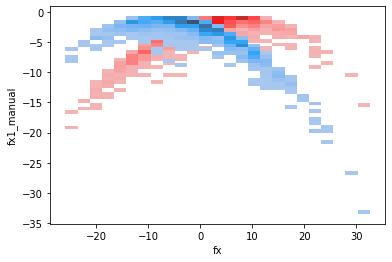

In [11]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_manual', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_manual', kde=True)

These curves are not what was expected (linear curves) and this exponential behaviour is attributed to the difference between the covariance matrices. The example subsequent ilustrate how Scikit-lean deals with the same problem.

### Example 3 - Scikit-learn

In [12]:
'''We'll use the same data from previous example, since the objective here is to compare both methods.'''

#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = data[['xA', 'xB', 'xC']]
y = data['y']

lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X, y)
lda.predict(X).tolist()

data['fx1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['fx0_sklearn'] = lda.predict_log_proba(X)[:,0]
data['fx1_minus_fx0_sklearn'] = lda.decision_function(X)
data['prediction_sklearn'] = lda.predict(X).tolist()

data.sample(3)

,xA,xB,xC,fx,y,fx1_manual,fx0_manual,fx1_minus_fx0_manual,prediction_manual,fx1_sklearn,fx0_sklearn,fx1_minus_fx0_sklearn,prediction_sklearn
826,15.961787,-6.931251,6.876885,15.907420,1,-2.208579,-10.208330,7.999751,1,-0.000440,-7.728691,7.728251,1
311,3.732066,-6.618850,-6.502925,-9.389708,0,-6.005240,-2.052697,-3.952543,0,-4.016057,-0.018188,-3.997868,0
923,15.015944,-0.024385,-7.914379,7.077180,1,-4.156802,-7.808260,3.651458,1,-0.023066,-3.780907,3.757841,1


The difference between the decision functions of both Scikit-learn and manual LDA is small, although the decision functions are wildly divergent. It can be explained by the specification in the mathematical equation:

**1. Scikit-learn:**

<img src="img/lda_equation_sklearn.PNG" />
<img src="img/lda_equation_sklearn_cst.PNG" />


**2. Manual:**

<img src="img/decision_fx_equation1.PNG" />

<img src="img/decision_fx_equation2.PNG" />

*obs.: the manual equation require equal covariance matrices to eliminate the x power 2 element, which will be crucial to achieve the desired linear curve*


In [13]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_sklearn']))
print(accuracy_score(data['y'], data['prediction_sklearn']))
print(precision_score(data['y'], data['prediction_sklearn']))
print(recall_score(data['y'], data['prediction_sklearn']))

[[484   9]
 [  5 502]]
0.986
0.9823874755381604
0.9901380670611439


<AxesSubplot:xlabel='fx', ylabel='fx1_sklearn'>

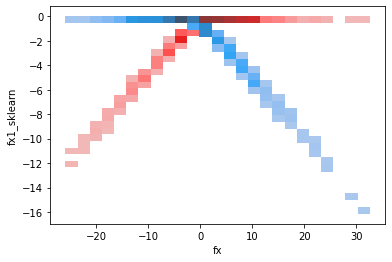

In [14]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_sklearn', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_sklearn', kde=True)

The Scikit-Learn LDA produces the desirable linear curves. Let's observe the covariance matrix used during the calculations.

In [15]:
#comparing the covariance matrices
#1. manual LDA
print(cov_class1)
print(cov_class0)

#2. sklearn LDA
print('\n',lda.covariance_)

           xA         xB         xC
xA  19.357841  -4.853061  -4.563991
xB  -4.853061  18.859192  -5.312231
xC  -4.563991  -5.312231  21.249282
           xA         xB         xC
xA  20.601431  -5.728951  -4.063289
xB  -5.728951  20.341197  -5.761823
xC  -4.063289  -5.761823  19.072519

 [[19.9309718  -5.27429273 -4.30851794]
 [-5.27429273 19.55062014 -5.52280574]
 [-4.30851794 -5.52280574 20.13581607]]


Comparing the matrices, is clear that the Scikit-learn's LDA estimate a unique covariance matrix using the mean of every element in the original covariance matrices. 

*obs.: the argument `store_covariance=True` is required for retrieving the covariance*

In [16]:
#Extra: 3d visualization with Plotly
import plotly.express as px

fig = px.scatter_3d(data,
                    x='xA' , y='xB', z='xC', color='prediction_sklearn')
fig.show()

### Cenario 3 - LDA with 2 normal distributed and high correlated features

            xA         xB         fx  y
376   5.291801  19.404225  24.696025  1
876  12.255465   0.865688  13.121153  1
409   3.537300 -10.387597  -6.850296  0
393  11.286328  11.810095  23.096423  1
148  15.779668   6.916761  22.696428  1


<AxesSubplot:xlabel='value', ylabel='Count'>

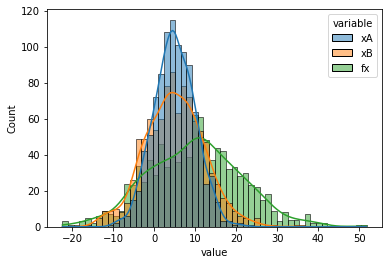

In [31]:
#feature A
meanA, stdA = 5, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = 0, 5
xB = xA + np.random.normal(meanB, stdB, 1000)

#class
fx = xA + xB

y = [1 if i >= (meanA + meanB) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'fx']), x='value', hue='variable', kde=True)

In [36]:
#how correlated are xA and xB?
X = data[['xA', 'xB']]
y = data['y']

X.corr()

,xA,xB
xA,1.000000,0.716216
xB,0.716216,1.000000


In [38]:
#LDA
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X, y)
lda.predict(X).tolist()

data['fx1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['fx0_sklearn'] = lda.predict_log_proba(X)[:,0]
data['prediction_sklearn'] = lda.predict(X).tolist()

data.sample(3)

,xA,xB,fx,y,prediction_sklearn,fx1_sklearn,fx0_sklearn
945,8.031630,8.115624,16.147254,1,1,-0.015479,-4.176013
252,7.258261,11.070567,18.328828,1,1,-0.008225,-4.804640
613,11.255404,16.541445,27.796849,1,1,-0.000245,-8.313422


[[336   1]
 [  7 656]]
0.992
0.9984779299847792
0.9894419306184012


<AxesSubplot:xlabel='fx', ylabel='fx1_sklearn'>

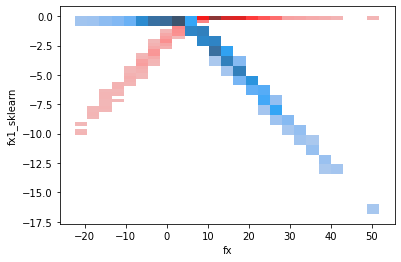

In [35]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_sklearn']))
print(accuracy_score(data['y'], data['prediction_sklearn']))
print(precision_score(data['y'], data['prediction_sklearn']))
print(recall_score(data['y'], data['prediction_sklearn']))

#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_sklearn', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_sklearn', kde=True)

**Conclusion:**
even with high correlated independent variables, the algorithm produced excelent metrics. For future studies, it can be explored if the existence of high correlation is more damaging in a specific cenario or even if the low correlation features is more of a recomendation than a requirement in itself. 